# **STOCK PRICE PREDICTION using RNN and LSTM **

In [1]:
# import libraries

import yfinance as yf

In [ ]:
# to install the library
# !pip install yfinance

In [2]:
yf.__version__

'0.2.61'

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


In [4]:
# downloading historical stock data using yfinance library
# ---------------------------------------------------------

ticker = "AAPL"  # Apple company stock code
# GOOG
# MSFT
start_date = "2015-01-01"
end_date = "2021-12-31"

In [5]:
# fetching the stock data
# -----------------------
stock_data = yf.download(ticker, start = start_date, end = end_date)


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [6]:
print(f"Downlaoded {len(stock_data)} days of {ticker} stock date")

Downlaoded 1762 days of AAPL stock date


In [7]:
print("Show few data ")
stock_data.head(3)

Show few data 


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.288588,24.757342,23.848713,24.746234,212818400
2015-01-05,23.604336,24.137516,23.417723,24.057539,257142000
2015-01-06,23.606548,23.866473,23.244429,23.668752,263188400


In [ ]:
# Data Description:
###################
# Open-price: price of the share when the open time
# low-price: price of the share when the price went low on the particular day
# high-price: price of the share when the price went high on the particular day
# close-price: price of the share when the close time/ end of the share market time
# volume: no. of shares traded on the day

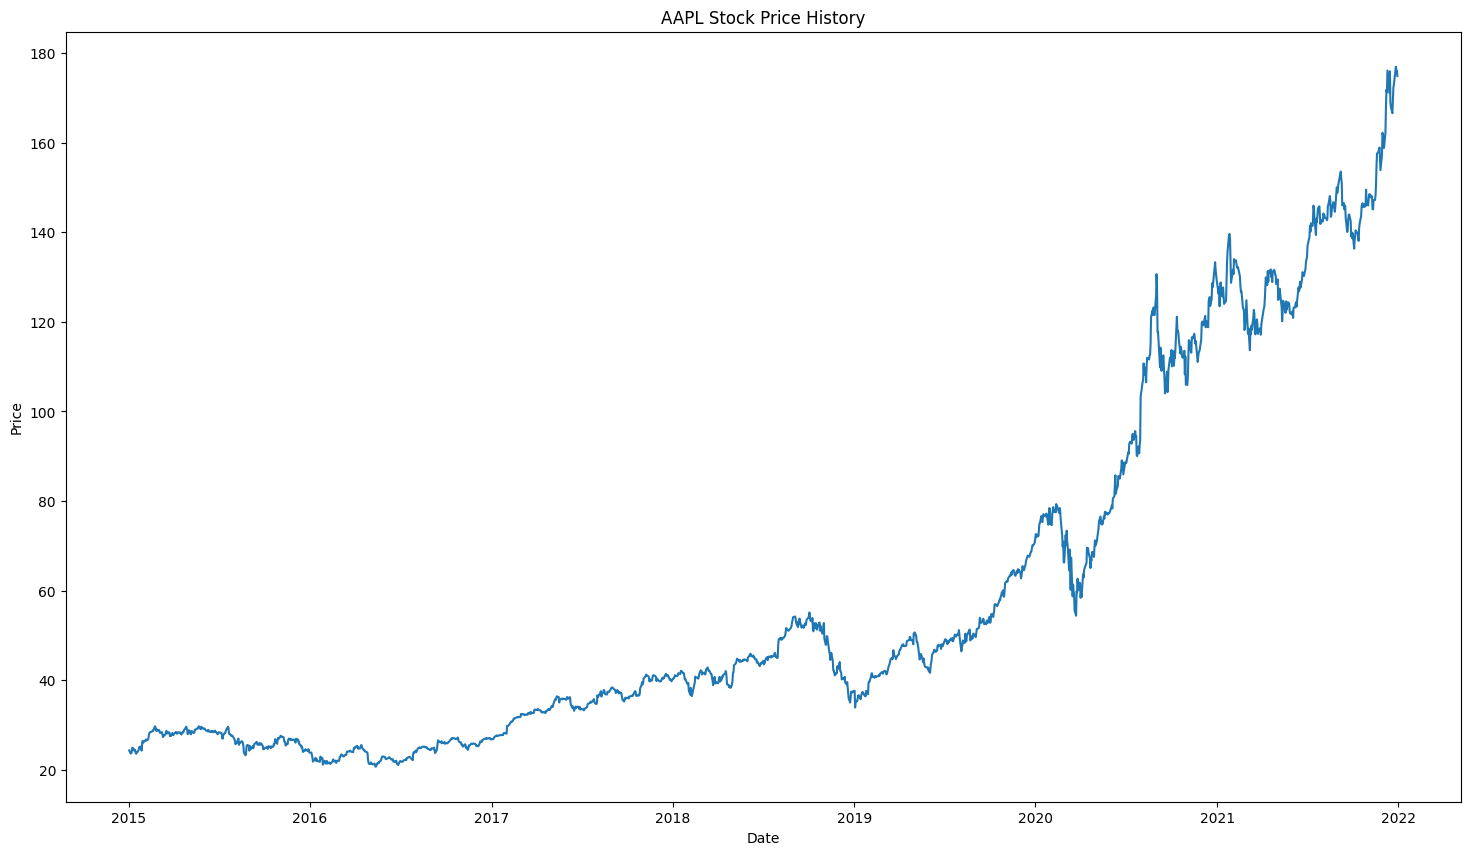

In [13]:
# Visualize the closing price of APPLe for the period 2015-2021
# -------------------------------------------------------------
plt.figure(figsize=(18,10))
plt.plot(stock_data['Close'])
plt.title(f'{ticker} Stock Price History')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [14]:
stock_data.columns

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [15]:
stock_data_orig = stock_data.copy()
stock_data_orig.shape

(1762, 5)

In [18]:
# to drop a multi level column
# ---------------------------
display(stock_data.head(2))

stock_data.columns = stock_data.columns.droplevel(1)

display(stock_data.head(2))

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.288588,24.757342,23.848713,24.746234,212818400
2015-01-05,23.604336,24.137516,23.417723,24.057539,257142000


Price,Close,High,Low,Open,Volume
Date,,,,,
2015-01-02,24.288588,24.757342,23.848713,24.746234,212818400
2015-01-05,23.604336,24.137516,23.417723,24.057539,257142000


In [19]:
stock_data.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')

In [26]:
data = stock_data.filter(['Close'])
print(type(data))
print(data)

# convcert datafreme to numpy array
dataset = data.values
print(type(dataset))
print(dataset)


<class 'pandas.core.frame.DataFrame'>
                 Close
Date                  
2015-01-02   24.288588
2015-01-05   23.604336
2015-01-06   23.606548
2015-01-07   23.937571
2015-01-08   24.857306
...                ...
2021-12-23  173.021591
2021-12-27  176.996719
2021-12-28  175.975906
2021-12-29  176.064285
2021-12-30  174.906082

[1762 rows x 1 columns]
<class 'numpy.ndarray'>
[[ 24.28858757]
 [ 23.60433578]
 [ 23.60654831]
 ...
 [175.97590637]
 [176.06428528]
 [174.90608215]]


In [20]:
print(stock_data.head(2))

Price           Close       High        Low       Open     Volume
Date                                                             
2015-01-02  24.288588  24.757342  23.848713  24.746234  212818400
2015-01-05  23.604336  24.137516  23.417723  24.057539  257142000


In [31]:
len(dataset), len(dataset)*0.8, int(len(dataset)*0.8), np.ceil(len(dataset)*0.8), int(np.ceil(len(dataset)*0.8))

(1762, 1409.6000000000001, 1409, np.float64(1410.0), 1410)

In [33]:
# to preparing how many observations in training data
# ----------------------------------------------------
training_data_len = int(np.ceil(len(dataset)*0.8))
print(f'Total observations: {len(dataset)}')
print(f'Training observations: {training_data_len}')



Total observations: 1762
Training observations: 1410


In [34]:
dataset

array([[ 24.28858757],
       [ 23.60433578],
       [ 23.60654831],
       ...,
       [175.97590637],
       [176.06428528],
       [174.90608215]])

In [35]:
# preprocessing
# --------------

from sklearn.preprocessing import MinMaxScaler
# perform scaling on the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset)

print(scaled_data[:5]) # slicing technique

[[0.02328848]
 [0.01891204]
 [0.0189262 ]
 [0.02104339]
 [0.02692596]]


In [37]:
# split the data and CREATE the training data
# -------------------------------------------
train_data = scaled_data[0:training_data_len, :]
train_data.shape

(1410, 1)

In [38]:
train_data

array([[0.02328848],
       [0.01891204],
       [0.0189262 ],
       ...,
       [0.55223086],
       [0.57610534],
       [0.56000468]])

In [39]:
# create a sequence of 60 days for predicting the next day's price
####################################################################

time_steps = 60

x_train = []
y_train = []

for i in range(time_steps, len(train_data)):
  x_train.append(train_data[i-time_steps:i ,0])
  y_train.append(train_data[i,0])

print(len(x_train) , len(y_train))

1350 1350


In [42]:
train_data.shape

(1410, 1)

In [41]:
train_data

array([[0.02328848],
       [0.01891204],
       [0.0189262 ],
       ...,
       [0.55223086],
       [0.57610534],
       [0.56000468]])

In [40]:
x_train

[array([0.02328848, 0.01891204, 0.0189262 , 0.02104339, 0.02692596,
        0.02709648, 0.02317474, 0.02455308, 0.02395625, 0.01972193,
        0.01854255, 0.02242169, 0.02360101, 0.02765066, 0.02847473,
        0.0286453 , 0.02301848, 0.03178549, 0.03688656, 0.03441416,
        0.03650294, 0.0365313 , 0.03782433, 0.03903691, 0.03759612,
        0.03872305, 0.04200406, 0.04608392, 0.04833781, 0.04922224,
        0.05029213, 0.05156174, 0.05117658, 0.05267443, 0.05766723,
        0.05648317, 0.05166159, 0.05398678, 0.05119084, 0.05208951,
        0.05247473, 0.05130492, 0.04826649, 0.0485375 , 0.04930782,
        0.04555612, 0.04231791, 0.04547043, 0.04424367, 0.04618374,
        0.04916515, 0.05120512, 0.04982136, 0.04753899, 0.04940765,
        0.04866592, 0.04394416, 0.04517094, 0.04375869, 0.04820941]),
 array([0.01891204, 0.0189262 , 0.02104339, 0.02692596, 0.02709648,
        0.02317474, 0.02455308, 0.02395625, 0.01972193, 0.01854255,
        0.02242169, 0.02360101, 0.02765066, 0.

In [44]:
# convert the x_train andy_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data in the input format [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

print('Training data -shape',x_train.shape)


Training data -shape (1350, 60, 1)


In [45]:

print('Training data -shape',y_train.shape)

Training data -shape (1350,)


In [46]:
y_train

array([0.04544198, 0.04518521, 0.04671156, ..., 0.55223086, 0.57610534,
       0.56000468])

In [ ]:
stock_data.to_csv('stock.csv')

In [47]:
stock_data.to_csv('stock.csv')

In [ ]:
'''
ytrain	             x_train
28.18495750427246	   day1-day-60 values
27.75227165222168	   day2-day61
27.712125778198242	 day3-day62

17-may-2025
close=1060  day-60(16may)=1000, day-59(15may)=990, day-58(14may)=970.....

[1000, 990, 970,....]
'''

In [87]:
# import libraries for building Neural Networks
# ----------------------------------------------
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout, LSTM

In [49]:
np.random.seed(42)

In [80]:
# Building a RNN
###############

# initialize the RNN model
rnn_model = Sequential()

# Add a simple RNN layer
rnn_model.add(SimpleRNN(units=50, input_shape=(x_train.shape[1],1), return_sequences=True))
rnn_model.add(Dropout(0.2)) # Added dropout to avoid overfitting

# Add another simple RNN layer
rnn_model.add(SimpleRNN(units=50), return_sequences=True)
rnn_model.add(Dropout(0.2)) # Added dropout to avoid overfitting

rnn_model.add(SimpleRNN(units=50))
rnn_model.add(Dropout(0.2)) # Added dropout to avoid overfitting

# rnn_model.add(Dense(50, inputshape...)
# rnn_model.add(Dense(1))

# Add a output layer
rnn_model.add(Dense(units=1))

# compile the model
rnn_model.compile(optimizer='adam', loss='mean_squared_error')


# train the model
rnn_history = rnn_model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.1)




Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 0.0317 - val_loss: 0.0022
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0049 - val_loss: 0.0028
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0031 - val_loss: 0.0023
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0020 - val_loss: 0.0013
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 9.3419e-04 - val_loss: 9.8553e-04
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 8.7627e-04 - val_loss: 0.0010
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 8.9400e-04 - val_loss: 7.2637e-04
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 7.2420e-04 - val_loss: 7.6077e-04


In [81]:
# create test dataset
#######################

# train-0-1350
# test-starting-pos1350

# print(training_data_len, time_steps, training_data_len-time_steps)
# print(len(scaled_data))
# print(scaled_data[training_data_len-time_steps, :])
test_data =  scaled_data[training_data_len-time_steps:, :]
# print('len',len(test_data))

x_test = []
y_test = dataset[training_data_len:, :]

# print(len(y_test))
for i in range(time_steps, len(test_data)):
  # print('-->',i)
  x_test.append(test_data[i-time_steps:i, 0])

x_test = np.array(x_test)
# print(x_test.shape)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

print(x_test.shape)



(352, 60, 1)


In [66]:
# predictions
1410+352

1762

In [82]:
rnn_predictions.shape

(352, 60, 1)

In [83]:
# Make predictions
# ---------------
rnn_predictions = rnn_model.predict(x_test)
rnn_predictions = scaler.inverse_transform(rnn_predictions)
rnn_predictions

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


array([[106.32234 ],
       [106.14985 ],
       [109.21939 ],
       [105.02372 ],
       [104.55057 ],
       [108.36097 ],
       [106.11719 ],
       [107.28429 ],
       [107.90558 ],
       [109.81837 ],
       [112.53001 ],
       [113.615265],
       [108.099655],
       [117.342316],
       [116.15595 ],
       [116.417206],
       [118.355965],
       [125.20232 ],
       [120.97294 ],
       [112.97056 ],
       [115.720184],
       [116.529175],
       [111.58502 ],
       [114.59338 ],
       [110.48728 ],
       [101.09858 ],
       [104.69729 ],
       [103.45385 ],
       [102.17837 ],
       [107.510254],
       [103.17551 ],
       [104.314995],
       [105.98471 ],
       [ 96.00148 ],
       [101.54313 ],
       [100.154434],
       [105.13593 ],
       [107.66435 ],
       [109.186356],
       [105.58269 ],
       [108.25247 ],
       [107.38567 ],
       [105.452736],
       [106.88312 ],
       [110.39886 ],
       [111.11264 ],
       [106.9369  ],
       [111.2

In [84]:
# Evaluate RNN RMSE
# -----------------
from sklearn.metrics import root_mean_squared_error

rnn_mse = root_mean_squared_error(rnn_predictions, y_test)
print(f'RNN model MSE:{rnn_mse}')

RNN model MSE:9.542980386118726


In [104]:
rnn_rmse = rnn_mse

In [85]:
# merge act-pred for easy plotting
# --------------------------------
train = data[:training_data_len]
pred_rnn = data[training_data_len:].copy()
pred_rnn['RNN_pred'] = rnn_predictions
pred_rnn

,Close,RNN_pred
Date,,
2020-08-10,109.776489,106.322342
2020-08-11,106.511757,106.149849
2020-08-12,110.051598,109.219391
2020-08-13,111.999237,105.023720
2020-08-14,111.899437,104.550568
...,...,...
2021-12-23,173.021591,150.925766
2021-12-27,176.996719,151.299026
2021-12-28,175.975906,155.806107


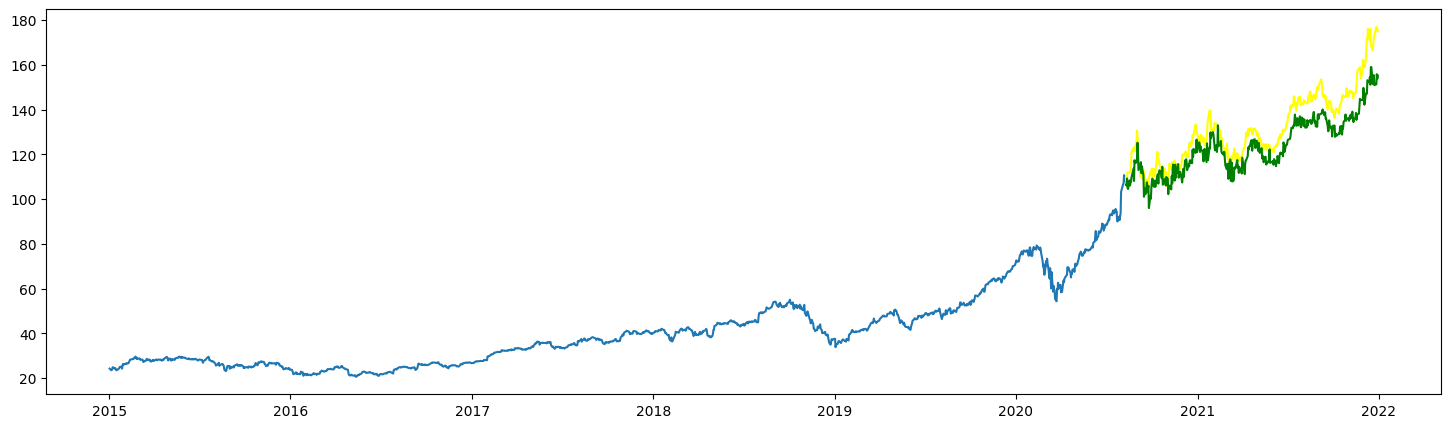

In [86]:
# plotting RNN predictions
# ------------------------
plt.figure(figsize=(18,5))

plt.plot(train.index, train['Close'], label='Training')
plt.plot(pred_rnn.index, pred_rnn['Close'], label='Actual',color='yellow')
plt.plot(pred_rnn.index, pred_rnn['RNN_pred'], label='RNN Predicted',color='green')


In [95]:
# Building a LSTM
#################

# initialize the LSTM model
lstm_model = Sequential()

# Add a simple RNN layer
lstm_model.add(LSTM(units=50, input_shape=(x_train.shape[1],1))) #return_sequences=True))
lstm_model.add(Dropout(0.2)) # Added dropout to avoid overfitting

'''
# Add another LSTM layer
lstm_model.add(LSTM(units=50))
lstm_model.add(Dropout(0.2)) # Added dropout to avoid overfitting
'''

# Add a output layer
lstm_model.add(Dense(units=1))

# compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')


# train the model
lstm_history = lstm_model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.1)



Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0086 - val_loss: 9.4059e-04
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 4.1182e-04 - val_loss: 8.7496e-04
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 2.8177e-04 - val_loss: 7.9027e-04
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 1.9392e-04 - val_loss: 7.6519e-04
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 2.1468e-04 - val_loss: 6.9795e-04
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 1.7648e-04 - val_loss: 7.0795e-04
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 1.8912e-04 - val_loss: 7.0904e-04
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 1.7166e-04 - val_loss: 6.3098e-04
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 1.5336e-04 - val_loss: 6.7690e-04
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 1.3974e-04 - val_loss: 6.3812e-04


<ipython-input-96-c6a18a3e9340>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


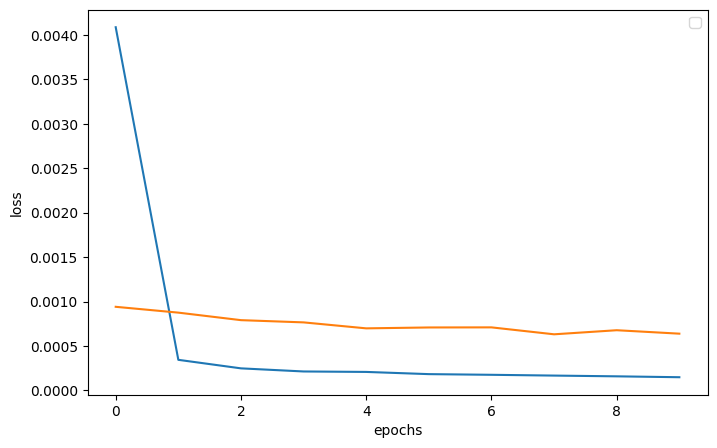

In [96]:
# visualizing Loss from training history
# --------------------------------------
plt.figure(figsize=(8,5))

plt.plot(lstm_history.history['loss'])
plt.plot(lstm_history.history['val_loss'])

plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()



In [97]:
# perform predictions
# -------------------
lstm_predictions = lstm_model.predict(x_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)
lstm_predictions

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


array([[106.467384],
       [108.64239 ],
       [110.423454],
       [112.05071 ],
       [113.61078 ],
       [115.02896 ],
       [116.24202 ],
       [117.29836 ],
       [118.190094],
       [119.07974 ],
       [120.319565],
       [121.84584 ],
       [123.42123 ],
       [125.04678 ],
       [126.51302 ],
       [127.76074 ],
       [129.05876 ],
       [130.66483 ],
       [132.22125 ],
       [132.93518 ],
       [132.99403 ],
       [132.0284  ],
       [130.68869 ],
       [128.89775 ],
       [126.78919 ],
       [124.795265],
       [123.00929 ],
       [121.250694],
       [119.49099 ],
       [117.598465],
       [115.929695],
       [114.63284 ],
       [113.3765  ],
       [112.28865 ],
       [111.64974 ],
       [111.552315],
       [111.8006  ],
       [112.39373 ],
       [113.26881 ],
       [114.05305 ],
       [114.94853 ],
       [115.66166 ],
       [116.32546 ],
       [116.9131  ],
       [117.54546 ],
       [118.66558 ],
       [119.86997 ],
       [121.0

In [98]:
# calculate RMSE for LSTM
#------------------------
lstm_mse = root_mean_squared_error(lstm_predictions, y_test)
print(f'LSTM model MSE:{lstm_mse}')

LSTM model MSE:9.929161213554924


In [106]:
lstm_rmse = lstm_mse

In [99]:
# merge act-pred to visualize in single graph
# -------------------------------------------
train = data[:training_data_len]
pred_lstm = data[training_data_len:].copy()
pred_lstm['LSTM_pred'] = lstm_predictions
print(pred_lstm)



                 Close   LSTM_pred
Date                              
2020-08-10  109.776489  106.467384
2020-08-11  106.511757  108.642387
2020-08-12  110.051598  110.423454
2020-08-13  111.999237  112.050713
2020-08-14  111.899437  113.610779
...                ...         ...
2021-12-23  173.021591  189.267151
2021-12-27  176.996719  189.336334
2021-12-28  175.975906  189.745255
2021-12-29  176.064285  190.300781
2021-12-30  174.906082  190.930374

[352 rows x 2 columns]


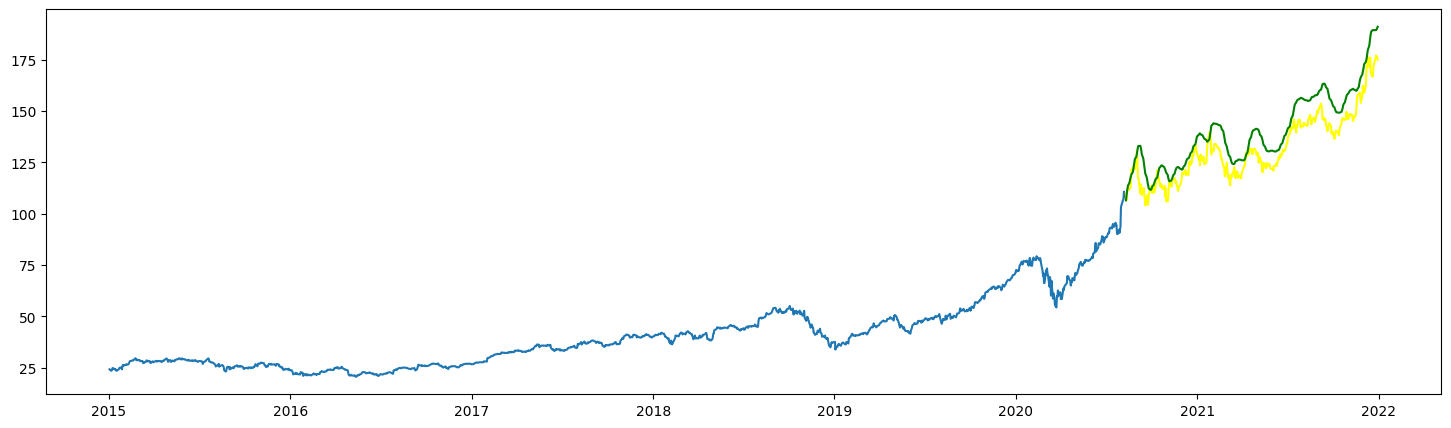

In [100]:
# Visualize the predictions
###########################
plt.figure(figsize=(18,5))

plt.plot(train.index, train['Close'], label='Training')
plt.plot(pred_lstm.index, pred_lstm['Close'], label='Actual',color='yellow')
plt.plot(pred_lstm.index, pred_lstm['LSTM_pred'], label='LSTM Predicted',color='green')


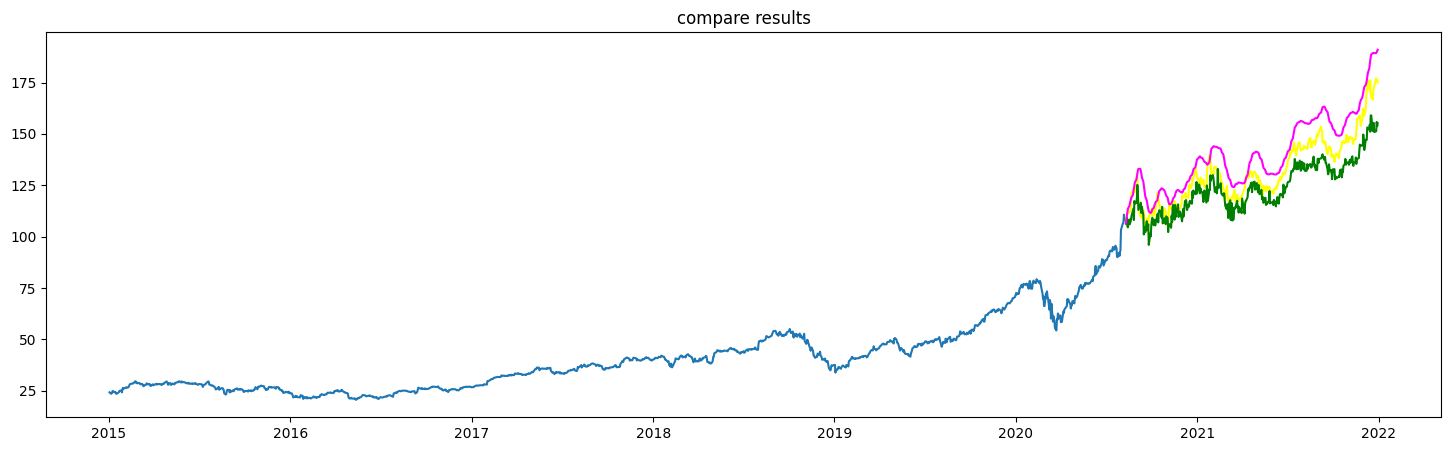

In [101]:
# results comparison of RNN & LSTM
####################################

plt.figure(figsize=(18,5))

plt.title('compare results')
plt.plot(train.index, train['Close'], label='Training')
plt.plot(pred_lstm.index, pred_lstm['Close'], label='Actual',color='yellow')

plt.plot(pred_rnn.index, pred_rnn['RNN_pred'], label='RNN Predicted',color='green')
plt.plot(pred_lstm.index, pred_lstm['LSTM_pred'], label='LSTM Predicted',color='magenta')

In [107]:
# analyze the difference in both models
#########################################

print(f'RNN  RMSE with 10 epochs: {rnn_rmse}')
print(f'LSTM RMSE with 10 epochs: {lstm_rmse}')

if lstm_rmse < rnn_rmse:
  res = ((rnn_rmse - lstm_rmse)/rnn_rmse) *100
  print(f'LSTM impproved prediction accuracy by {res}% compared to RNN with 10 epochs')
else:
  res = ((lstm_rmse - rnn_rmse)/lstm_rmse) *100
  print(f'RNN impproved prediction accuracy by {res}% compared to LSTM with 10 epochs')

RNN  RMSE with 10 epochs: 9.542980386118726
LSTM RMSE with 10 epochs: 9.929161213554924
RNN impproved prediction accuracy by 3.8893600288108674% compared to LSTM with 10 epochs
